<a href="https://colab.research.google.com/github/tajuar-akash-hub/Machine-learning-algorithms/blob/main/Losgistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Dataset/diabetes_two (1).csv")
df.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,NaN,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,600.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 519 non-null    float64
 1   Gender              519 non-null    object 
 2   Polyuria            520 non-null    object 
 3   Polydipsia          520 non-null    object 
 4   sudden weight loss  520 non-null    object 
 5   weakness            519 non-null    object 
 6   Polyphagia          520 non-null    object 
 7   Genital thrush      520 non-null    object 
 8   visual blurring     520 non-null    object 
 9   Itching             520 non-null    object 
 10  Irritability        520 non-null    object 
 11  delayed healing     520 non-null    object 
 12  partial paresis     520 non-null    object 
 13  muscle stiffness    520 non-null    object 
 14  Alopecia            520 non-null    object 
 15  Obesity             520 non-null    object 
 16  class   

In [ ]:
df['Age'] = df["Age"].fillna(df["Age"].median())

In [ ]:
most_frequent_category = df["Gender"].mode().iloc[0]
df['Gender'].fillna(most_frequent_category,inplace=True)

<ipython-input-5-7bc8462f1d20>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(most_frequent_category,inplace=True)


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,1
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["Gender"] = le.fit_transform(df['Gender'])
#ques : how this is working? didn't get it!

df["Polyuria"] = le.fit_transform(df['Polyuria'])

df["Polydipsia"] = le.fit_transform(df['Polydipsia'])

df["sudden weight loss"] = le.fit_transform(df['sudden weight loss'])

df["weakness"] = le.fit_transform(df['weakness'])

df["Polyphagia"] = le.fit_transform(df['Polyphagia'])

df["Genital thrush"] = le.fit_transform(df['Genital thrush'])

df["visual blurring"] = le.fit_transform(df['visual blurring'])

df["Itching"] = le.fit_transform(df['Itching'])

df["Irritability"] = le.fit_transform(df['Irritability'])

df["delayed healing"] = le.fit_transform(df['delayed healing'])

df["partial paresis"] = le.fit_transform(df['partial paresis'])

df["muscle stiffness"] = le.fit_transform(df['muscle stiffness'])

df["Alopecia"] = le.fit_transform(df['Alopecia'])


df["Obesity"] = le.fit_transform(df['Obesity'])

df["class"] = le.fit_transform(df['class'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 520 non-null    float64
 1   Gender              520 non-null    int64  
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    520 non-null    int64  
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

In [ ]:
value_counts = df.groupby('class').size().reset_index(name='count')
print(value_counts)

   class  count
0      0    200
1      1    320


In [ ]:
z_score = (df['Age'] - df['Age'].mean())/df['Age'].std()

In [ ]:
for i in z_score:
  if i<-3:
    print("You have outlier",i)
  elif i>3:
      print("You have outlier",i)
  else:
    continue
  #it is not showing the index of outlier

You have outlier 20.34568184362212


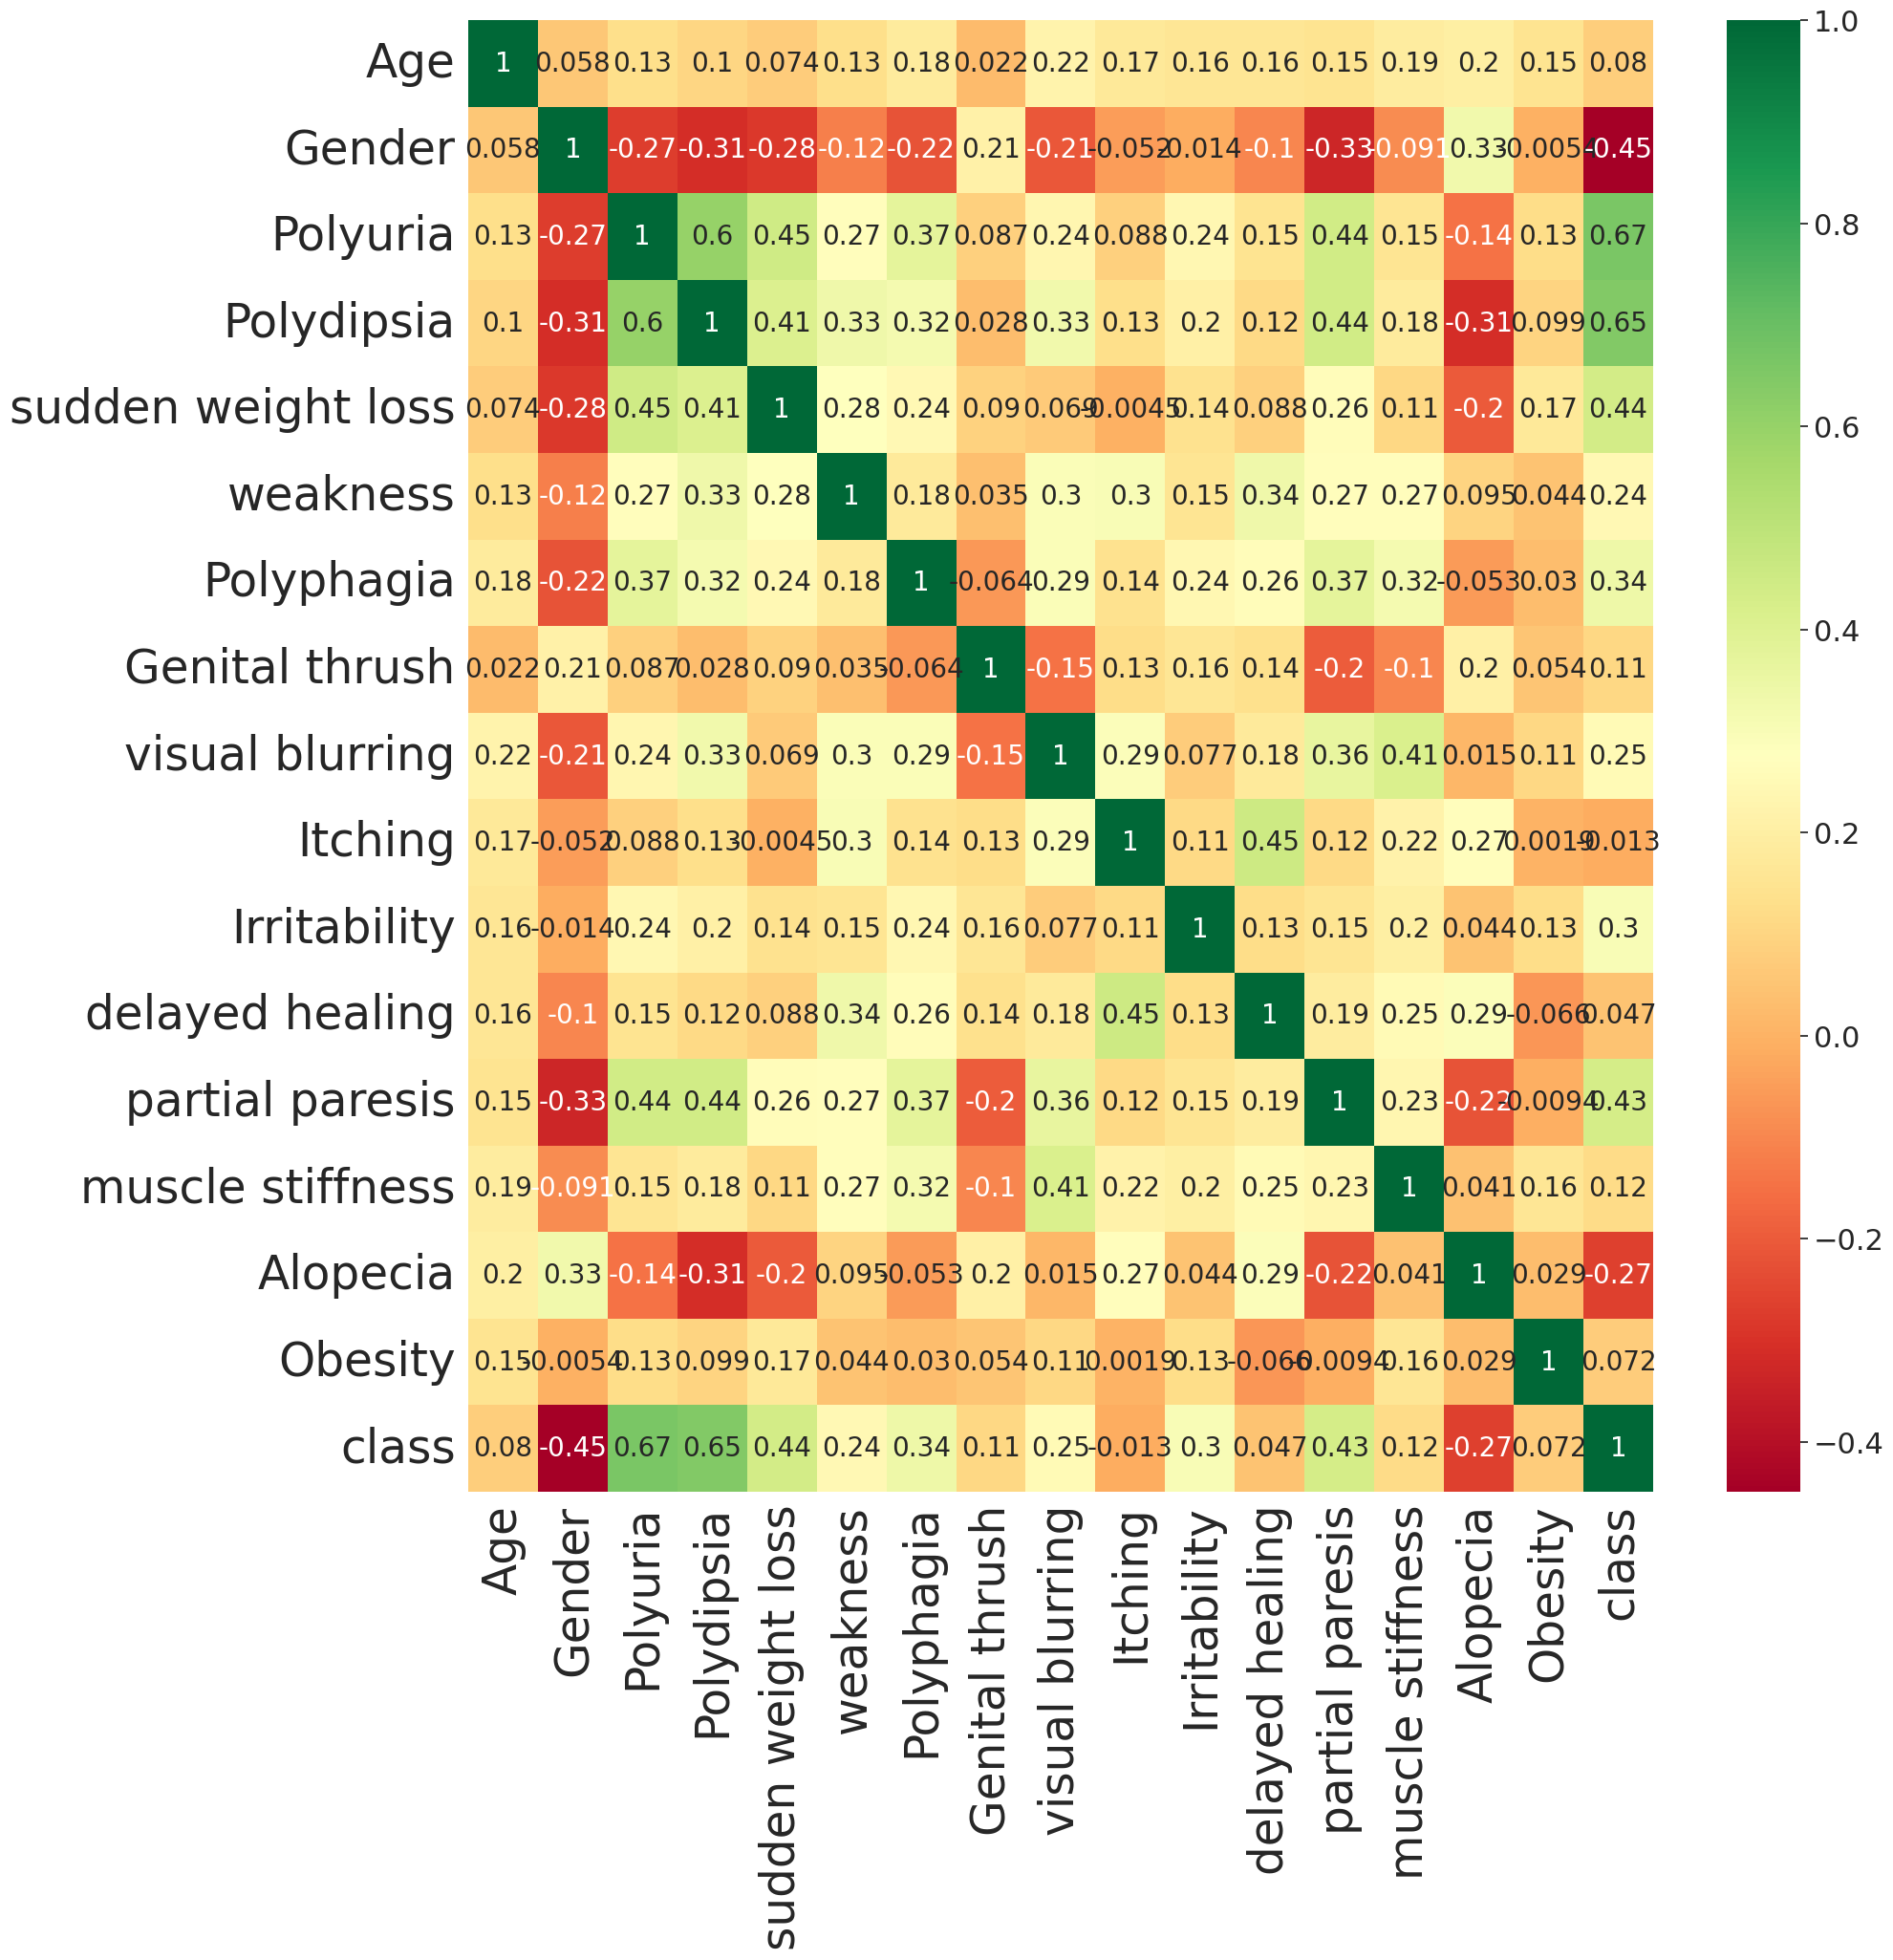

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size': 20})



plt.yticks(fontsize = 35)
plt.xticks(fontsize = 35)

plt.show()


In [ ]:
correleations = df.corr(method='pearson')
print(correleations['class'].sort_values(ascending=False).to_string())

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.244598
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.079512
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233


In [ ]:
df['class'].iloc[0:200]

,class
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,1
197,1
198,1


In [ ]:
from sklearn.utils import shuffle
shuffled_df = shuffle(df)

In [ ]:
rearranged_df = shuffled_df.reset_index(drop=True)

In [ ]:
rearranged_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,39.0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
1,35.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,34.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,63.0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1
4,62.0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,65.0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0
516,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
517,45.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
518,61.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1


In [ ]:
x = rearranged_df.drop(columns=['class'])
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,39.0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
1,35.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,34.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,63.0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1
4,62.0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,65.0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0
516,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
517,45.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
518,61.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
y = rearranged_df['class']
y

,class
0,1
1,0
2,0
3,1
4,1
...,...
515,0
516,1
517,0
518,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler1 = MinMaxScaler()
MinMax_scaled_df = scaler1.fit_transform(x)


In [ ]:
MinMax_scaled_df

array([[0.03938356, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03253425, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03082192, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04965753, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07705479, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04109589, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
print("train data size (features):",len(x_train))
print("train data size (target):",len(y_train))

print("test data size(feature)",len(x_test))
print("test data size(target)",len(y_test))

train data size (features): 416
train data size (target): 416
test data size(feature) 104
test data size(target) 104


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l2' , tol = 0.0001 , solver = 'liblinear',max_iter=100,multi_class='auto')


In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', solver='liblinear')

In [ ]:
pred_values = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
accuracy = accuracy_score(y_test,pred_values)
precision = precision_score(y_test,pred_values)
recall = recall_score(y_test,pred_values)
f1 = f1_score(y_test,pred_values)
AUC = roc_curve(y_test,pred_values)



In [ ]:
print("accuracy : ",accuracy)
print("precision : ",precision)
print("recall : ",recall)
print("f1 score : ",f1)
print("AUC Score : ",AUC)

accuracy :  0.9423076923076923
precision :  0.967741935483871
recall :  0.9375
f1 score :  0.9523809523809523
AUC Score :  (array([0.  , 0.05, 1.  ]), array([0.    , 0.9375, 1.    ]), array([inf,  1.,  0.]))
